# ORIE 4580/5580/5581 Assignment 3

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [12]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats$\ldots$). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

In general,

An LCG is defined by the recurrence relation:
$X_{n+1}=(aX_n+c)  mod m$

Where:
- $X$ is the sequence of pseudo-random numbers
- $X_0$ is the seed (initial value)
- $a$ is the multiplier
- $c$ is the increment
- $m$ is the modulus
- All values are integers

$x_{n+1} = (5 x_n) \mod 16\,$ starting with seed $x_0 = 1$

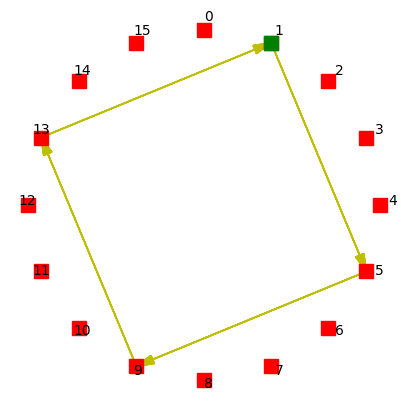

In [4]:
# Ans
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

$y_{n+1} = (2 y_n) \mod 7\,$ starting with seed $y_0 = 1$

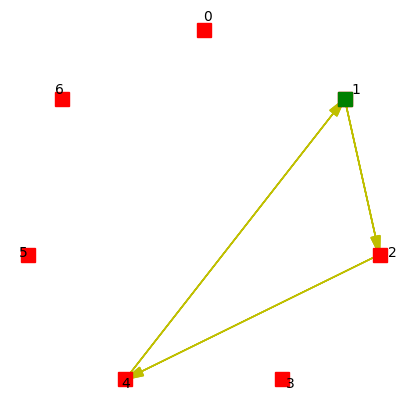

In [5]:
# Ans
m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

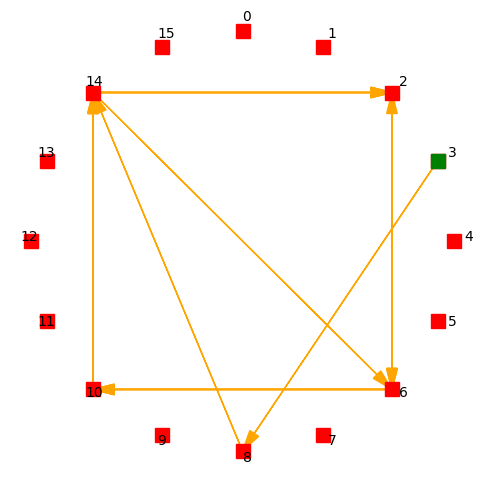

In [7]:
m = 16
a_1 = 5
a_2 = 2

seed = 1   # seed x_0 = seed y_0 = 1
c = 0      # c_x = c_y = 0
n = m + 1

# Generate LCG sequences
x_seq = LCG(n=n, m=m, a=a_1, c=c, seed=seed)
y_seq = LCG(n=n, m=m, a=a_2, c=c, seed=seed)

# Combine sequences
z_seq = [(x + y) % m for x, y in zip(x_seq, y_seq)]

# Plot the result
fig = plt.figure(figsize=(6,6))
plot_clock_face(m, fig, annotate=True)
plot_clock_path(m, z_seq, fig, color='orange')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

In [10]:
def detect_cycle(seq):
    """Detect cycle length (period) by storing seen values."""
    seen = {}
    for i, val in enumerate(seq):
        if val in seen:
            return i - seen[val]  # Period is the difference in indices
        seen[val] = i
    return None


def LCG(a, c, m, seed, n):
    x = seed
    result = []
    for _ in range(n):
        result.append(x)
        x = (a * x + c) % m
    return result

In [17]:
# for x_n:
m_x = 16
a_x = 5

# for y_n:
m_y = 7
a_y = 2

# for x_n & y_n):
c = 0
seed = 1
n = 1000      # Generate enough values to cover a possible cycle

sequence_x = LCG(a_x, c, m_x, seed, n)
sequence_y = LCG(a_y, c, m_y, seed, n)

period_x = detect_cycle(sequence_x)
print("Period of x_n:", period_x)

period_y = detect_cycle(sequence_y)
print("Period of y_n:", period_y)

period_z = detect_cycle(z_seq)
print("Period of z_n:", period_z)

Period of x_n: 4
Period of y_n: 3
Period of z_n: 5


### Ans.
As shown in the output above, the periods of the pseudo-random sequences are as follows:
- Period of $x_n = 4$
- Period of $y_n = 3$
- Period of $z_n = 5$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$$F^{-1}(y)=
\begin{cases}
y & \mbox{for $0 \leq y < \frac{1}{2}$}\\
1 & \mbox{for $\frac{1}{2}\leq y \leq 1$},
\end{cases}$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

A geometric distribution has the pmf:

$$P(X=k)=p(1−p)^{k−1} \, , \,\, k \in \{1,2,3,…\}$$

Before implementing the inversion algorithm, we must compute the cdf:

$$F(k) = P(X≤k)$$

$$F(k) = ∑_{i=1}^k p(1-p)^{i−1} = 1-(1-p)^k$$

which is a geometric series.

Applying the cdf to the pseudoinverse definition

$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$

we get

$$F(k) = 1-(1-p)^k ≥ y$$

Solving for k,

$$1-(1-p)^k ≥ y \iff (1-p)^k ≤ 1 - y \iff k ≥ \frac{log(1 - y)}{log(1 - p)}$$

Since a geometric distribution is discrete, k must be an integer. Hence,

$$⌈F^{-1}(y) = \frac{log(1 - y)}{log(1 - p)}⌉$$

Now, for the inversion algorithm, let $U$ ~ $Uniform[0,1]$. Then

$$X_0 = F^{-1}(U) = ⌈\frac{log(1 - U)}{log(1 - p)}⌉$$

This inversion sampling formula is implemented in the code below.

In [83]:
def sample_geometric(p):
  # np.random.seed(0)
  U = np.random.uniform()
  return int(np.ceil(np.log(1 - U) / np.log(1 - p)))

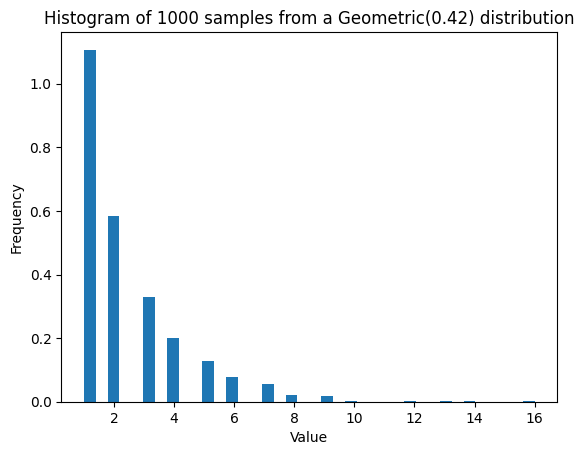

In [84]:
p = 0.42
samples = []

for i in range(1000):
  samples.append(sample_geometric(p))

# plot histogram
# scipy.stats.probplot(samples, dist="norm", plot=plt)
plt.hist(samples, bins='auto', density=True)
plt.title("Histogram of 1000 samples from a Geometric(0.42) distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

The cdf is
$$F(x) =
	\begin{cases}
		0 & \text{for } x < 0 \\
		e^{-2}(e^x -1) & \text{for } 0 ≤ x ≤ 2 \\
		1 - e^{-x} & \text{for }x > 2
	\end{cases}
	$$

To find the inverse $F^{-1}(u)$,

$$e^{-2}(e^x -1) = u \iff e^x -1 = e^2u \iff ln(e^x) = ln(e^2u + 1) \iff x = ln(e^2u + 1)$$

$$1 - e^{-x} = u \iff ln(e^{-x}) = ln(1 - u) \iff -x = ln(1-u) \iff x = -ln(1 - u)$$


So
$$F^{-1}(u) =
	\begin{cases}
		ln(e^2u + 1) & \text{for } 0 ≤ u ≤ 1 − e^{−2} \\
		-ln(1 - u) & \text{for } 1 - e^{-2} < u < 1
	\end{cases}
	$$

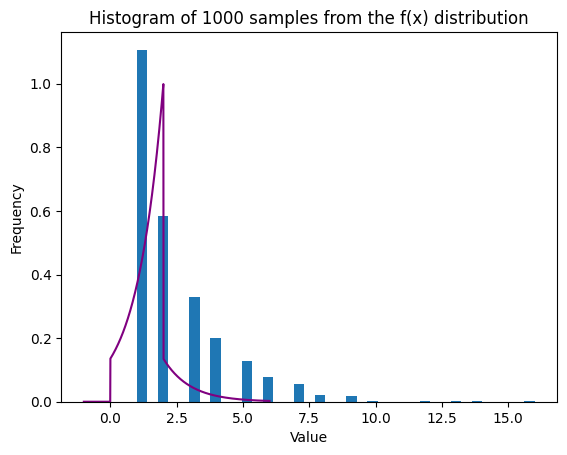

In [89]:
samples_c = []

for i in range(1000):
  np.random.seed(0)
  u = np.random.uniform()     # returns a random number uniformly distributed between 0 and 1 — that is, it samples from U ~ Uniform(0,1)
  if u <= 1 - np.exp(-2):
    samples_c.append(np.log(np.exp(2)*u + 1))
  else:
    samples_c.append(-np.log(1 - u))


# Define x range
x = np.linspace(-1, 6, 1000)  # covers before 0 and beyond 2

# Define f(x) piecewise
f = np.piecewise(
    x,
    [x < 0, (0 <= x) & (x <= 2), x > 2],
    [0, lambda x: np.exp(x - 2), lambda x: np.exp(-x)])


# plot histogram
plt.hist(samples, bins='auto', density=True)
# plot the pdf f(x)
plt.plot(x, f, label=r'$f(x)$', color='purple')
plt.title("Histogram of 1000 samples from the f(x) distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

As shown in the plot above, the histogram roughly follows the pdf.

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

Want samples of a rv $X \in [a,b]$ with pdf $f(x) ≤ M$

$\rightarrow $ support of $f(x)$: $a = 0, b = 1$

$\rightarrow M = max(f(x)) = f(1) = \frac{1}{4}(5(1)^4+4(1)^3+3(1)^2+1) = \frac{13}{4} = 3.25$

Hence, $M = 3.25$.

Now we can apply this to give the acceptance-rejection algorithm.

In [23]:
def f(x):
    return 0.25 * (5 * x**4 + 4 * x**3 + 3 * x**2 + 1)

def sample_X(n_samples=1):
    a = 0
    b = 1
    M = 3.25  # max value of f(x)
    samples = []

    while len(samples) < n_samples:
        U1 = np.random.uniform()
        U2 = np.random.uniform()
        Z1 = a + (b - a) * U1       # proposal x in [0,1]
        Z2 = M * U2                 # proposal y in [0, M]

        if Z2 <= f(Z1):
            samples.append(Z1)

    return np.array(samples)

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

Let $(z_1, z_2)$ be a trial. Then

$\mathbb{P}(accept \, a \, proposal) = \mathbb{P}[(z_1, z_2) \, accepted] = \mathbb{P}[z_2 ≤ f(z_1)] = \frac{1}{M(b-a)} \rightarrow \frac{1}{3.25(1-0)} = \frac{1}{3.25} = p$

Let $N$ = number of uniform samples

Since $X$ is a geometric random variable,

$\mathbb{E}(N) = \frac{1}{p} = M  = 3.25$

Hence, on average, the acceptance-rejection algorithm needs $3.25$ samples from $Uniform(0,1)$ to generate one sample of $X$ (where "generate one sample of $X$" $\iff$ "get $1$ sample accepted from $f(x)$").

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

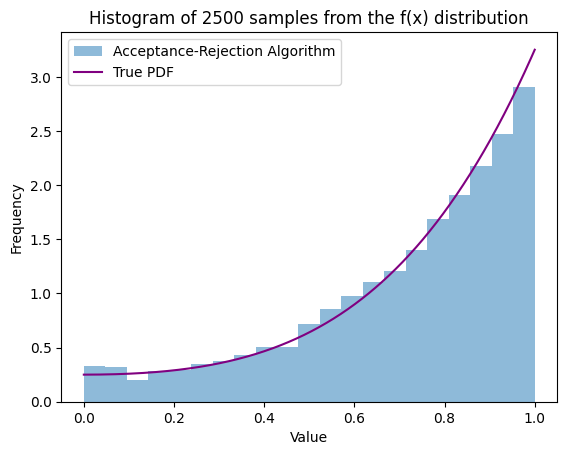

In [34]:
samples = sample_X(n_samples=2500)

plt.hist(samples, bins='auto', density=True, alpha=0.5, label="Acceptance-Rejection Algorithm")

# plot the true pdf
x = np.linspace(0, 1, 1000)
y = f(x)
plt.plot(x, y, label='True PDF', color='purple')

plt.title("Histogram of 2500 samples from the f(x) distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a *Laplace* (i.e., two-sided Exponential) distribution, which has pdf $g(x) = \frac{1}{2}e^{-|x|}$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

First we find the cdf:

$$G(x) =
\begin{cases}
\frac{1}{2}e^{x/2}  & \text{ for } x < 0 \\
1 - \frac{1}{2}e^{-x/2} & \text{ for } x ≥ 0
\end{cases}$$

Then solve for $G^{-1}(u)$:

$$u = \frac{1}{2}e^{x/2} \implies ln(e^{x/2}) = ln(2u) \implies x = 2ln(2u)$$

$$u = 1 - \frac{1}{2}e^{-x/2} \implies ln(e^{-x/2}) = ln(2(1-u)) \implies x = -2ln(2(1-u))$$

Hence,

$$G^{-1}(x) =
\begin{cases}
2ln(2u)  & \text{ for } 0 < u < \frac{1}{2} \\
-2ln(2(1-u)) & \text{ for } \frac{1}{2} ≤ u < 1
\end{cases}$$

In [36]:
def sample_laplace(n_samples=1):
    u = np.random.uniform(0, 1, size=n_samples)
    x = np.where(
        u < 0.5,
        2 * np.log(2 * u),
        -2 * np.log(2 * (1 - u)))
    return x

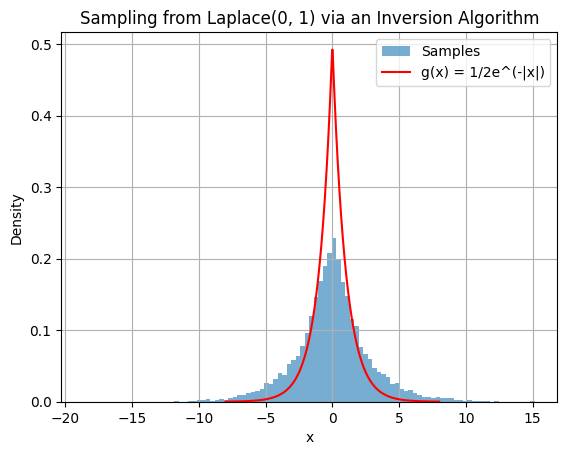

In [45]:
import matplotlib.pyplot as plt

samples = sample_laplace(10000)

# Histogram of the sampled data
plt.hist(samples, bins=100, density=True, alpha=0.6, label="Samples")

# Plot theoretical Laplace(0,1) PDF
x_vals = np.linspace(-8, 8, 500)
pdf = 0.5 * np.exp(-np.abs(x_vals))  # Laplace(0,1)

plt.plot(x_vals, pdf, 'r-', label="g(x) = 1/2e^(-|x|)")

plt.title("Sampling from Laplace(0, 1) via an Inversion Algorithm")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

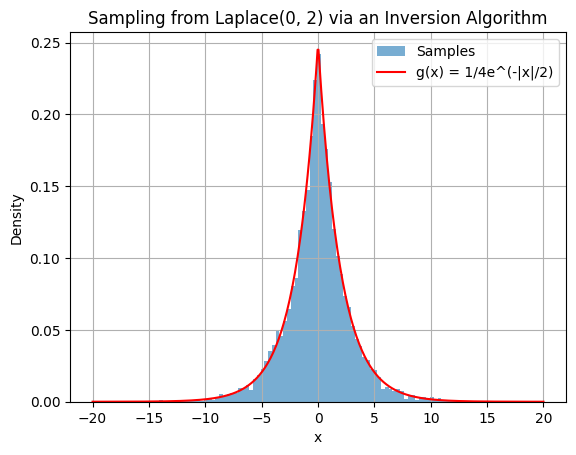

In [47]:
samples = sample_laplace(10000)

plt.hist(samples, bins=100, density=True, alpha=0.6, label='Samples')

# Plot the theoretical PDF
x_vals = np.linspace(-20, 20, 500)
pdf = 0.25 * np.exp(-np.abs(x_vals) / 2)
plt.plot(x_vals, pdf, 'r-', label='g(x) = 1/4e^(-|x|/2)')

plt.title("Sampling from Laplace(0, 2) via an Inversion Algorithm")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

###Ans.

$$kg(x) \geq f(x)$$

$$k \geq \frac{f(x)}{g(x)} \quad \forall\,x\in\mathbb{R}$$

$$\frac{1}{2}ke^{-|x|} \geq \frac{e^{-x^2/2}}{\sqrt{2\pi}}$$

$$k \geq \frac{2e^{-x^2/2}}{e^{|x|}\sqrt{2\pi}}$$

$$\implies smallest \, k = \frac{2e^{-|x|-\frac{x^2}{2}}}{\sqrt{2\pi}}$$

Now we use code to compute the smallest k:

Minimum k = 1.3154833154134895


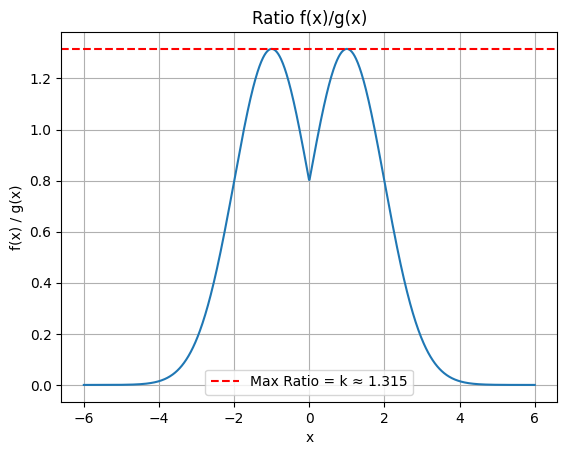

In [69]:
# Define f(x): standard normal PDF
def f(x):
    return (np.exp(-x**2 / 2) / np.sqrt(2 * np.pi))

# Define g(x): Laplace(0,1) PDF
def g(x):
    return 0.5 * np.exp(-np.abs(x))

# Compute ratio
x_vals = np.linspace(-6, 6, 1000)
ratios = f(x_vals) / g(x_vals)
k = np.max(ratios)
print("Minimum k =", k)

# Plot ratio
plt.plot(x_vals, ratios)
plt.axhline(k, color='red', linestyle='--', label=f'Max Ratio = k ≈ {k:.3f}')
plt.title('Ratio f(x)/g(x)')
plt.xlabel('x')
plt.ylabel('f(x) / g(x)')
plt.grid(True)
plt.legend()
plt.show()

From this, below is a proposed implementation of the Acceptance-Rejection Algorithm:

In [72]:
def sample_normal_via_ar(n_samples=1):
    np.random.seed(0)
    samples = []
    k = 1.3155  # Upper bound from f(x)/g(x)
    while len(samples) < n_samples:
        # Step 1: Sample from Laplace(0,1) via inverse transform
        u1 = np.random.uniform()
        z = np.log(2 * u1) if u1 < 0.5 else -np.log(2 * (1 - u1))

        # Step 2: Sample U for acceptance
        u2 = np.random.uniform()

        # Step 3: Accept/reject
        fx = (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)
        gx = 0.5 * np.exp(-abs(z))

        if u2 < fx / (k * gx):
            samples.append(z)

    return np.array(samples)

$$\mathbb{P}(acceptance) = \frac{1}{k} \approx \frac{1}{1.315} \approx 0.76 = p$$

Since the Acceptance-Rejection algorithm is a geometric process (repeating trials until the first success),

$$\mathbb{E}[number \, of \, samples \, needed \, for \, generating \, each \, sample] = \frac{1}{p} = k \approx 1.315$$

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Average:  0.01007185090915932
95% CI:  [-1.98379227  2.09194866]


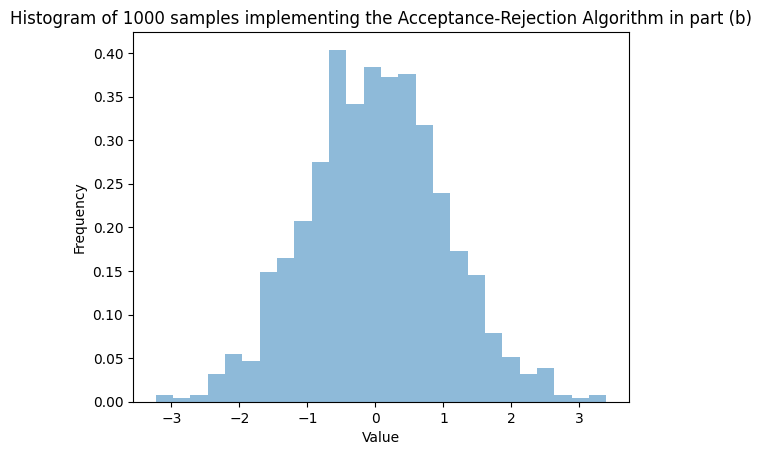

In [79]:
samples = sample_normal_via_ar(n_samples=1000)

# Report the average
avg = np.mean(samples)
print("Average: ", avg)

# Report the 95% CI
CI = np.percentile(samples, [2.5, 97.5])
print("95% CI: ", CI)

# Histogram of the sampled data
plt.hist(samples, bins='auto', density=True, alpha=0.5)
plt.title("Histogram of 1000 samples implementing the Acceptance-Rejection Algorithm in part (b)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

First find the cdf:

$$G(x) = ∫_{-∞}^x g(t) \, dt = ∫_{-∞}^x \frac {1}{\pi(1+t^2)} \, dt = \frac{1}{\pi}[arctan(x) + \frac{\pi}{2}]$$

$$G(x) = \frac{1}{\pi}arctan(x) + \frac{1}{2} \quad ∀ x \in \mathbb{R}$$

Now solve for $G^{-1}(u)$:
$$u = \frac{1}{\pi}arctan(x) + \frac{1}{2}$$

$$\implies \pi(u - \frac{1}{2}) = arctan(x)\implies x = tan(\pi(u - \frac{1}{2}))$$

$$G^{-1}(u) = tan(\pi(u - \frac{1}{2})) \, for \, u \in (0,1)$$

In [58]:
import numpy as np

def sample_cauchy(n=1):
    np.random.seed(0)
    u = np.random.uniform(0, 1, size=n)
    return np.tan(np.pi * (u - 0.5))

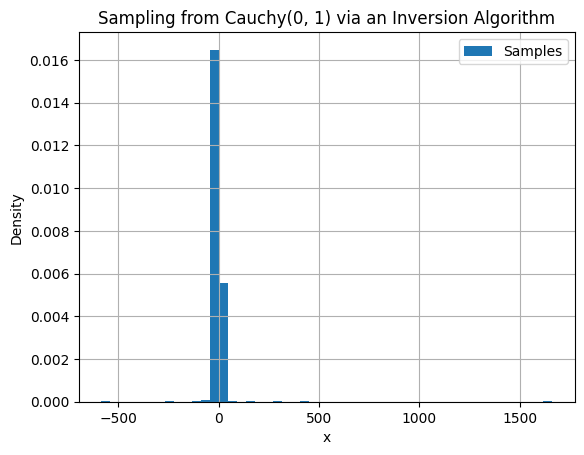

In [65]:
samples = sample_cauchy(1000)

# Histogram of the sampled data
plt.hist(samples, bins=50, density=True, label="Samples")
plt.title("Sampling from Cauchy(0, 1) via an Inversion Algorithm")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

#### Repeated part (b):

$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$

$g(x) = \frac{1}{\pi(1+x^2)}$

$$kg(x) \geq f(x)$$

$$k \geq \frac{f(x)}{g(x)} \quad \forall\,x\in\mathbb{R}$$

$$k \geq \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{1}{\pi(1+x^2)}}$$

$$k \geq \frac{e^{-x^2/2}\sqrt{\pi}(1+x^2)}{\sqrt{2}}$$

$$\implies smallest \, k = \frac{e^{-x^2/2}\sqrt{\pi}(1+x^2)}{\sqrt{2}}$$

Now we use code to compute the smallest k:

Minimum k = 1.520340038970348


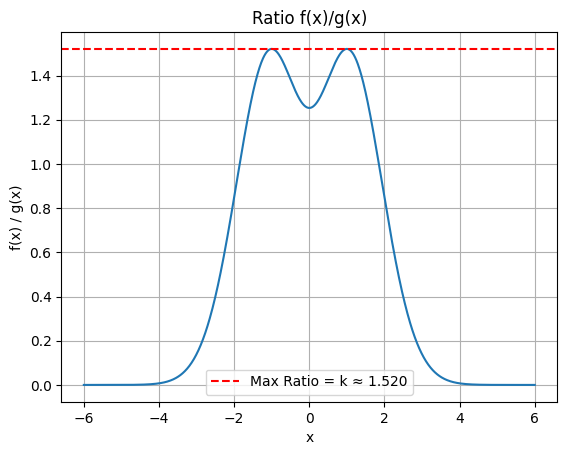

In [67]:
# Define f(x): standard normal PDF
def f(x):
    return (np.exp(-x**2 / 2) / np.sqrt(2 * np.pi))

# Define g(x): Laplace(0,1) PDF
def g(x):
    return 1 / (np.pi * (1 + x**2))

# Compute ratio
x_vals = np.linspace(-6, 6, 1000)
ratios = f(x_vals) / g(x_vals)
k = np.max(ratios)
print("Minimum k =", k)

# Plot ratio
plt.plot(x_vals, ratios)
plt.axhline(k, color='red', linestyle='--', label=f'Max Ratio = k ≈ {k:.3f}')
plt.title('Ratio f(x)/g(x)')
plt.xlabel('x')
plt.ylabel('f(x) / g(x)')
plt.grid(True)
plt.legend()
plt.show()

From this, below is a proposed implementation of the Acceptance-Rejection Algorithm:

In [70]:
def sample_new_normal_via_ar(n_samples=1):
    np.random.seed(0)
    samples = []
    k = 1.520  # Upper bound from f(x)/g(x)
    while len(samples) < n_samples:
        # Step 1: Sample from Laplace(0,1) via inverse transform
        u1 = np.random.uniform()
        z = np.log(2 * u1) if u1 < 0.5 else -np.log(2 * (1 - u1))

        # Step 2: Sample U for acceptance
        u2 = np.random.uniform()

        # Step 3: Accept/reject
        fx = (np.exp(-z**2 / 2) / np.sqrt(2 * np.pi))
        gx = 1 / (np.pi * (1 + z**2))

        if u2 < fx / (k * gx):
            samples.append(z)

    return np.array(samples)

$$\mathbb{P}(acceptance) = \frac{1}{k} \approx \frac{1}{1.520} \approx 0.66 = p$$

Since the Acceptance-Rejection algorithm is a geometric process (repeating trials until the first success),

$$\mathbb{E}[number \, of \, samples \, needed \, for \, generating \, each \, sample] = \frac{1}{p} = k \approx 1.520$$


#### Repeated part (c):

Average:  0.0012135709651411907
95% CI:  [-1.95413915  1.97884939]


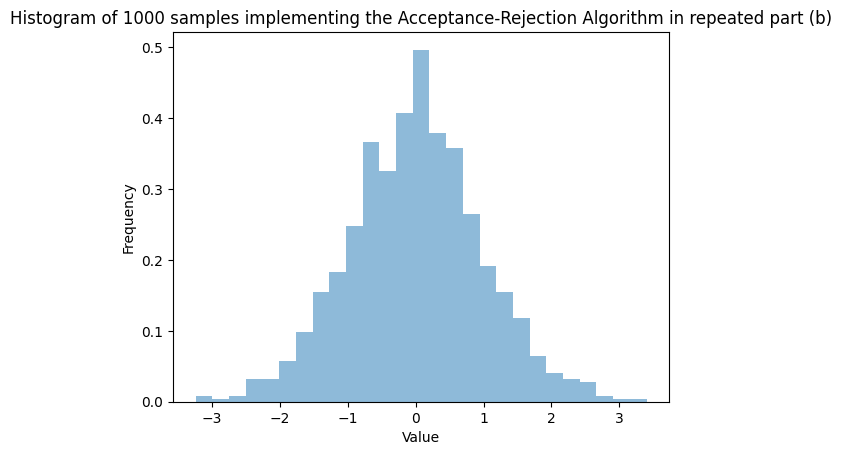

In [80]:
samples = sample_new_normal_via_ar(n_samples=1000)

# Report the average
avg = np.mean(samples)
print("Average: ", avg)

# Report the 95% CI
CI = np.percentile(samples, [2.5, 97.5])
print("95% CI: ", CI)

# Histogram of the sampled data
plt.hist(samples, bins='auto', density=True, alpha=0.5)
plt.title("Histogram of 1000 samples implementing the Acceptance-Rejection Algorithm in repeated part (b)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()